In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load dataset
df = pd.read_csv('https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv')

In [3]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [5]:
#check dataset for missing values
df.isnull().any()

FullDate     False
Tmax         False
SysLoad      False
GasPrice     False
ElecPrice    False
dtype: bool

In [6]:
#convert column to datetime 
df["FullDate" ] = pd.to_datetime(df[ "FullDate" ]) 
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [7]:
df.set_index( "FullDate" , inplace= True ) 
df

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...
2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060


Text(0, 0.5, 'Price of Electricity')

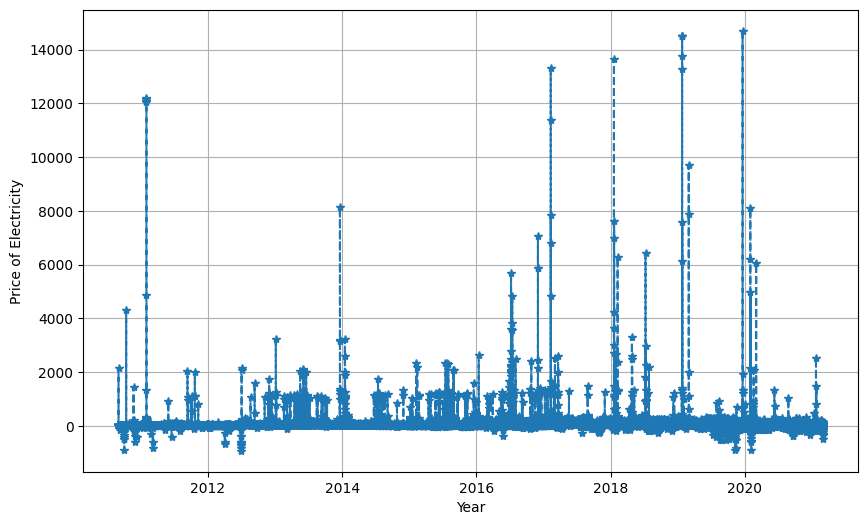

In [8]:
plt.figure(figsize=( 10 , 6 )) 
plt.plot(df.index, df.ElecPrice, '--' , marker= '*') 
plt.grid() 
plt.xlabel( 'Year' ) 
plt.ylabel( 'Price of Electricity' )

In [9]:
#downsampling
df_daily = df.resample('D').sum()

In [10]:
df_daily

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


Text(0, 0.5, 'Price of Electricity')

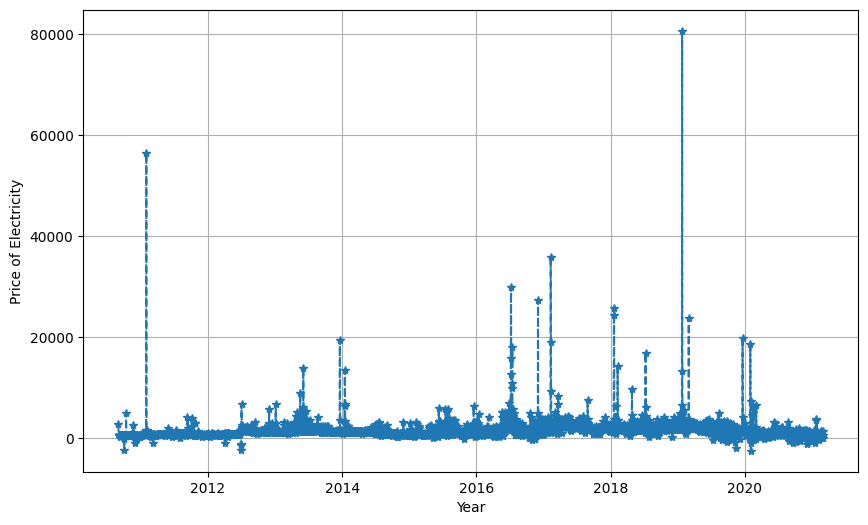

In [11]:
plt.figure(figsize=( 10 , 6 )) 
plt.plot(df_daily.index, df_daily.ElecPrice, '--' , marker= '*') 
plt.grid() 
plt.xlabel( 'Year' ) 
plt.ylabel( 'Price of Electricity' )

In [12]:
import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller 


In [13]:
adf_result1 = adfuller(df_daily[ 'SysLoad' ]) 
adf_result1

(-3.6901589888366493,
 0.004253725504574063,
 30,
 3803,
 {'1%': -3.432070672988693,
  '5%': -2.8623002987378547,
  '10%': -2.567174716967499},
 79103.01504886392)

In [14]:
#p-value for sysload
print( f'p-value: {adf_result1[ 1 ]} ' ) 

p-value: 0.004253725504574063 


In [15]:
adf_result2 = adfuller(df_daily[ 'GasPrice' ]) 
adf_result2

(-2.902766697165179,
 0.04502721288462552,
 27,
 3806,
 {'1%': -3.4320693157877544,
  '5%': -2.8622996992165364,
  '10%': -2.5671743978048323},
 32857.5394299048)

In [16]:
#p-value and 10% critical value for gas price
print( f'p-value: {adf_result2[ 1 ]} ' ) 
print( 'Critical Values:' ) 
for k, v in adf_result2[ 4 ].items(): 
    print( f' {k} : {v} ' ) 

p-value: 0.04502721288462552 
Critical Values:
 1% : -3.4320693157877544 
 5% : -2.8622996992165364 
 10% : -2.5671743978048323 


In [17]:
adf_result3 = adfuller(df_daily[ 'ElecPrice' ]) 
adf_result3

(-8.269053866873799,
 4.848817773711772e-13,
 20,
 3813,
 {'1%': -3.432066157296446,
  '5%': -2.8622983040036005,
  '10%': -2.5671736550459663},
 69130.36360776308)

In [18]:
#5% critical value for ElecPrice
print( 'Critical Values:' ) 
for k, v in adf_result3[ 4 ].items(): 
    print( f' {k} : {v} ' ) 

Critical Values:
 1% : -3.432066157296446 
 5% : -2.8622983040036005 
 10% : -2.5671736550459663 


In [19]:
df_daily.iloc[2757]

Tmax          540.0000
SysLoad      7696.9113
GasPrice      201.5880
ElecPrice    1833.0000
Name: 2018-03-20 00:00:00, dtype: float64

In [20]:
#specify the cutoff date for splitting the data
cutoff_date = '2018-03-20'

In [21]:
train_data = df_daily.loc[df_daily.index < cutoff_date]
test_data = df_daily.loc[df_daily.index >= cutoff_date]

In [22]:
train_data.shape

(2757, 4)

In [23]:
test_data.shape

(1077, 4)

In [24]:
#Time series with Facebook Prophet 
from prophet import Prophet
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [25]:
train_data.reset_index(inplace = True)
train_data.rename(columns={'FullDate': 'ds','ElecPrice':'y'}, inplace=True)

In [26]:
train_data

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
2752,2018-03-15,609.6,27139.02585,220.6272,2717.340
2753,2018-03-16,648.0,19710.46400,216.9600,2277.335
2754,2018-03-17,724.8,1079.34705,209.0400,1718.385
2755,2018-03-18,508.8,-4102.43795,203.9880,1088.015


In [27]:
test_data.reset_index(inplace = True)
test_data.rename(columns={'FullDate': 'ds','ElecPrice':'y'}, inplace=True)

In [28]:
train_df = pd.DataFrame(train_data[['ds','y']])
train_df

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555
...,...,...
2752,2018-03-15,2717.340
2753,2018-03-16,2277.335
2754,2018-03-17,1718.385
2755,2018-03-18,1088.015


In [29]:
#build univariate time series model using facebook prophet
model = Prophet(daily_seasonality=True) 
model.fit(train_df) 

DEBUG:cmdstanpy:input tempfile: /tmp/tmpadhql809/2hbeb820.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpadhql809/cnzq3clg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59703', 'data', 'file=/tmp/tmpadhql809/2hbeb820.json', 'init=/tmp/tmpadhql809/cnzq3clg.json', 'output', 'file=/tmp/tmpadhql809/prophet_model9t3pygtj/prophet_model-20230404122919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [30]:
#make predictions with univariate model
future = model.make_future_dataframe(periods= len(test_data)) 
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,2368.737782,-1456.115186,3378.429631,2368.737782,2368.737782,-1384.015122,-1384.015122,-1384.015122,-1528.282243,...,159.425272,159.425272,159.425272,-15.158151,-15.158151,-15.158151,0.0,0.0,0.0,984.722659
1,2010-09-02,2368.709708,-1458.799268,3413.466936,2368.709708,2368.709708,-1303.650086,-1303.650086,-1303.650086,-1528.282243,...,257.210227,257.210227,257.210227,-32.578070,-32.578070,-32.578070,0.0,0.0,0.0,1065.059622
2,2010-09-03,2368.681634,-1464.666575,3148.562060,2368.681634,2368.681634,-1528.724293,-1528.724293,-1528.724293,-1528.282243,...,50.294831,50.294831,50.294831,-50.736881,-50.736881,-50.736881,0.0,0.0,0.0,839.957341
3,2010-09-04,2368.653560,-1835.149779,2976.006619,2368.653560,2368.653560,-1869.125763,-1869.125763,-1869.125763,-1528.282243,...,-271.543943,-271.543943,-271.543943,-69.299577,-69.299577,-69.299577,0.0,0.0,0.0,499.527797
4,2010-09-05,2368.625486,-1823.086841,2756.889292,2368.625486,2368.625486,-1959.098641,-1959.098641,-1959.098641,-1528.282243,...,-342.856809,-342.856809,-342.856809,-87.959590,-87.959590,-87.959590,0.0,0.0,0.0,409.526845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,2021-02-24,5092.075695,470.122206,6293.944129,3212.651776,6671.411929,-1618.759795,-1618.759795,-1618.759795,-1528.282243,...,159.425272,159.425272,159.425272,-249.902824,-249.902824,-249.902824,0.0,0.0,0.0,3473.315901
3830,2021-02-25,5092.888733,434.914578,6383.570770,3210.686005,6674.360263,-1552.644410,-1552.644410,-1552.644410,-1528.282243,...,257.210227,257.210227,257.210227,-281.572394,-281.572394,-281.572394,0.0,0.0,0.0,3540.244324
3831,2021-02-26,5093.701772,257.308020,6058.268614,3208.720235,6677.308596,-1786.686815,-1786.686815,-1786.686815,-1528.282243,...,50.294831,50.294831,50.294831,-308.699403,-308.699403,-308.699403,0.0,0.0,0.0,3307.014956
3832,2021-02-27,5094.514810,-217.203323,5764.853026,3206.754465,6680.256930,-2130.915663,-2130.915663,-2130.915663,-1528.282243,...,-271.543943,-271.543943,-271.543943,-331.089477,-331.089477,-331.089477,0.0,0.0,0.0,2963.599147


In [31]:
# Filter the forecast to include only the future dates
forecast = forecast[forecast['ds'] > train_df['ds'].iloc[-1]]
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2757,2018-03-20,4220.498931,183.762630,4855.030796,4220.498931,4220.498931,-1683.586418,-1683.586418,-1683.586418,-1528.282243,...,9.737791,9.737791,9.737791,-165.041966,-165.041966,-165.041966,0.0,0.0,0.0,2536.912513
2758,2018-03-21,4221.311969,351.259285,5110.417895,4221.311969,4221.311969,-1530.985974,-1530.985974,-1530.985974,-1528.282243,...,159.425272,159.425272,159.425272,-162.129003,-162.129003,-162.129003,0.0,0.0,0.0,2690.325995
2759,2018-03-22,4222.125007,422.179538,5054.331606,4222.125007,4222.125007,-1432.724119,-1432.724119,-1432.724119,-1528.282243,...,257.210227,257.210227,257.210227,-161.652103,-161.652103,-161.652103,0.0,0.0,0.0,2789.400888
2760,2018-03-23,4222.938045,92.022969,4891.860006,4222.938045,4222.938045,-1641.433384,-1641.433384,-1641.433384,-1528.282243,...,50.294831,50.294831,50.294831,-163.445972,-163.445972,-163.445972,0.0,0.0,0.0,2581.504661
2761,2018-03-24,4223.751083,-88.288331,4484.842556,4223.751083,4223.751083,-1967.095068,-1967.095068,-1967.095068,-1528.282243,...,-271.543943,-271.543943,-271.543943,-167.268883,-167.268883,-167.268883,0.0,0.0,0.0,2256.656015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,2021-02-24,5092.075695,470.122206,6293.944129,3212.651776,6671.411929,-1618.759795,-1618.759795,-1618.759795,-1528.282243,...,159.425272,159.425272,159.425272,-249.902824,-249.902824,-249.902824,0.0,0.0,0.0,3473.315901
3830,2021-02-25,5092.888733,434.914578,6383.570770,3210.686005,6674.360263,-1552.644410,-1552.644410,-1552.644410,-1528.282243,...,257.210227,257.210227,257.210227,-281.572394,-281.572394,-281.572394,0.0,0.0,0.0,3540.244324
3831,2021-02-26,5093.701772,257.308020,6058.268614,3208.720235,6677.308596,-1786.686815,-1786.686815,-1786.686815,-1528.282243,...,50.294831,50.294831,50.294831,-308.699403,-308.699403,-308.699403,0.0,0.0,0.0,3307.014956
3832,2021-02-27,5094.514810,-217.203323,5764.853026,3206.754465,6680.256930,-2130.915663,-2130.915663,-2130.915663,-1528.282243,...,-271.543943,-271.543943,-271.543943,-331.089477,-331.089477,-331.089477,0.0,0.0,0.0,2963.599147


In [32]:
#function to calculate mean absolute percentage error
def mape(actual_value, forecast_value):
  actual_value = np.array(actual_value)
  forecast_value = np.array(forecast_value)
  return np.mean(np.abs(((actual_value - forecast_value) / actual_value)) * 100).round(2)
mape(test_data['y'],forecast['yhat'])

549.06

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [34]:
# root mean squared error of univariate model
mse = mean_squared_error(test_data['y'], forecast['yhat'])
rmse = np.sqrt(mse)
rmse.round(2)


3217.2

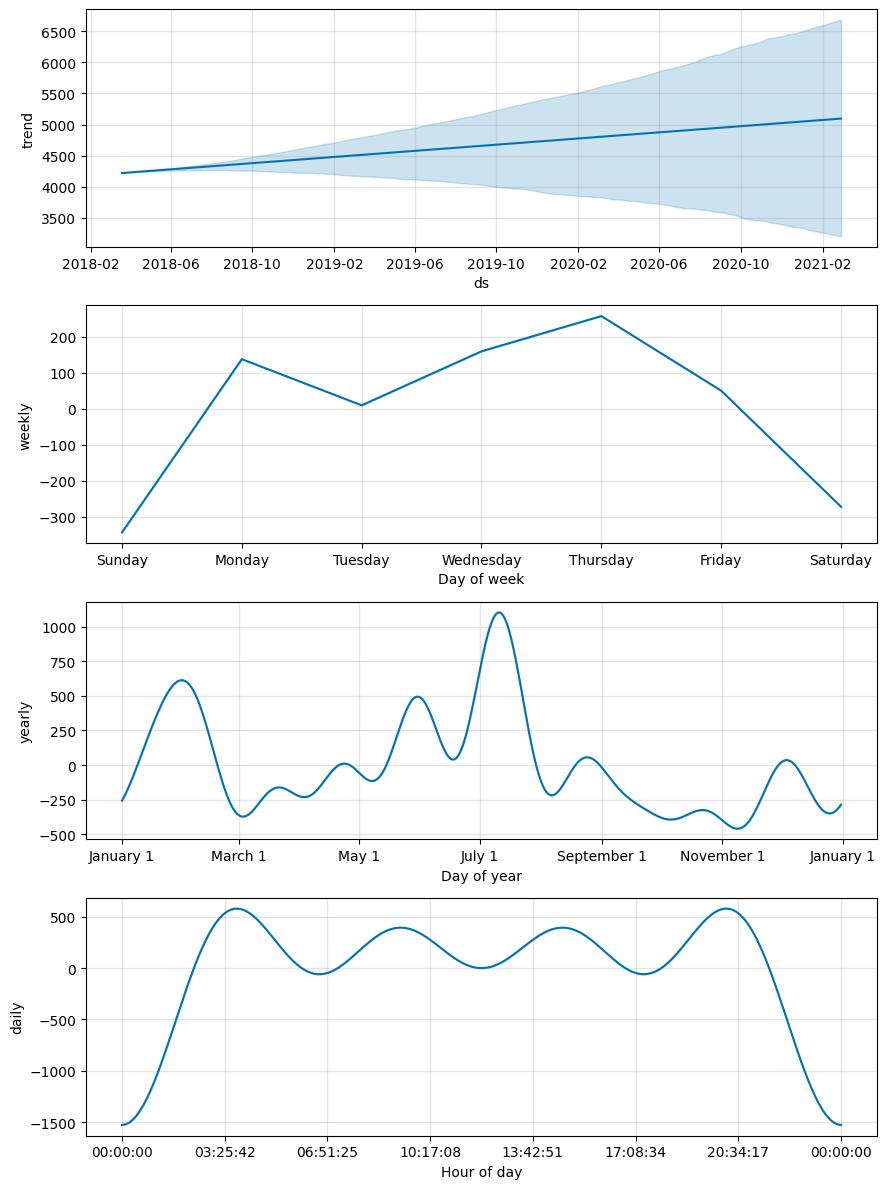

In [35]:
# Plot the components of the forecast
fig = model.plot_components(forecast)
#Month of yearly seasonality is July

In [36]:
regressors = ['SysLoad','GasPrice','Tmax']

In [37]:
regressor_df = pd.DataFrame({
  'ds': train_data['ds'],
  'SysLoad': train_data['SysLoad'],
  'GasPrice': train_data['GasPrice'],
  'Tmax': train_data['Tmax']
})
regressor_df


,ds,SysLoad,GasPrice,Tmax
0,2010-09-01,41565.38000,88.5600,379.2
1,2010-09-02,38898.99000,88.5600,369.6
2,2010-09-03,41665.76000,106.8000,439.2
3,2010-09-04,35638.08500,81.3600,328.8
4,2010-09-05,35611.41000,106.8000,357.6
...,...,...,...,...
2752,2018-03-15,27139.02585,220.6272,609.6
2753,2018-03-16,19710.46400,216.9600,648.0
2754,2018-03-17,1079.34705,209.0400,724.8
2755,2018-03-18,-4102.43795,203.9880,508.8


In [38]:
train_data

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
2752,2018-03-15,609.6,27139.02585,220.6272,2717.340
2753,2018-03-16,648.0,19710.46400,216.9600,2277.335
2754,2018-03-17,724.8,1079.34705,209.0400,1718.385
2755,2018-03-18,508.8,-4102.43795,203.9880,1088.015


In [39]:
#build multivariate model
model2 = Prophet(daily_seasonality=True)

In [40]:
for regressor in regressors:
    model2.add_regressor(regressor)


In [41]:
#fit data to multivariate model
model2.fit(train_data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpadhql809/ke2qry7a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpadhql809/4uubkktv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62257', 'data', 'file=/tmp/tmpadhql809/ke2qry7a.json', 'init=/tmp/tmpadhql809/4uubkktv.json', 'output', 'file=/tmp/tmpadhql809/prophet_model1ep815mc/prophet_model-20230404122926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [42]:
test_data

,ds,Tmax,SysLoad,GasPrice,y
0,2018-03-20,540.0,7696.91130,201.5880,1833.000
1,2018-03-21,571.2,4658.05865,203.2560,1730.490
2,2018-03-22,722.4,19161.78525,203.2560,2260.550
3,2018-03-23,811.2,18090.43435,198.6456,2138.760
4,2018-03-24,832.8,3763.53865,180.2160,1721.700
...,...,...,...,...,...
1072,2021-02-24,537.6,-1525.49745,134.4000,634.770
1073,2021-02-25,518.4,4539.07855,130.5048,577.515
1074,2021-02-26,547.2,9517.02430,130.1808,1445.495
1075,2021-02-27,564.0,4932.88015,130.0800,488.980


In [43]:
#predictions with multivariate model
future_df = pd.DataFrame({
  'ds': pd.date_range(start='2018-03-20', end='2021-02-28')
})

for regressor in regressors:
    future_df['SysLoad'] = train_data['SysLoad']
    future_df['GasPrice'] = train_data['GasPrice']
    future_df['Tmax'] = train_data['Tmax']

forecast2 = model2.predict(future_df)


In [44]:
forecast2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,GasPrice,GasPrice_lower,GasPrice_upper,SysLoad,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,3276.633440,-3.947983,4386.249503,3276.633440,3276.633440,-556.381670,-556.381670,-556.381670,1038.070623,...,-84.769475,-84.769475,-84.769475,-39.339832,-39.339832,-39.339832,0.0,0.0,0.0,2219.940106
1,2018-03-21,3277.310378,-62.204624,4427.389210,3277.310378,3277.310378,-556.381670,-556.381670,-556.381670,888.949019,...,42.445347,42.445347,42.445347,-30.103645,-30.103645,-30.103645,0.0,0.0,0.0,2207.947314
2,2018-03-22,3277.987317,440.015064,4999.319219,3277.987317,3277.987317,-289.045146,-289.045146,-289.045146,1043.684515,...,145.612059,145.612059,145.612059,-25.125983,-25.125983,-25.125983,0.0,0.0,0.0,2738.834382
3,2018-03-23,3278.664255,-349.533711,3904.838995,3278.664255,3278.664255,-661.909246,-661.909246,-661.909246,706.578328,...,-44.564353,-44.564353,-44.564353,-24.264599,-24.264599,-24.264599,0.0,0.0,0.0,1840.235944
4,2018-03-24,3279.341194,-105.628344,4408.222556,3279.341194,3279.341194,-289.045146,-289.045146,-289.045146,705.086491,...,-117.378688,-117.378688,-117.378688,-27.267836,-27.267836,-27.267836,0.0,0.0,0.0,2136.464981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,2021-02-24,4002.311355,294.385016,4687.225830,3234.450004,4781.781860,-93.643252,-93.643252,-93.643252,389.656176,...,42.445347,42.445347,42.445347,-434.240963,-434.240963,-434.240963,0.0,0.0,0.0,2492.253308
1073,2021-02-25,4002.988293,-359.529785,4268.602061,3233.629152,4782.687252,217.065107,217.065107,217.065107,-577.330047,...,145.612059,145.612059,145.612059,-460.640352,-460.640352,-460.640352,0.0,0.0,0.0,1913.419488
1074,2021-02-26,4003.665232,15.270377,4529.367535,3232.808300,4784.992266,-76.231202,-76.231202,-76.231202,290.609047,...,-44.564353,-44.564353,-44.564353,-481.266258,-481.266258,-481.266258,0.0,0.0,0.0,2277.934949
1075,2021-02-27,4004.342170,-521.465653,4123.302519,3231.987449,4787.348260,-109.648267,-109.648267,-109.648267,-132.099288,...,-117.378688,-117.378688,-117.378688,-495.881671,-495.881671,-495.881671,0.0,0.0,0.0,1735.051552


In [45]:
#mean absolute percentage error of multivariate model
mape(test_data['y'],forecast2['yhat'])

396.15

In [46]:
#root mean squared error of multivariate model
mse = mean_squared_error(test_data['y'], forecast2['yhat'])
rmse = np.sqrt(mse)
rmse.round(2)

3024.91

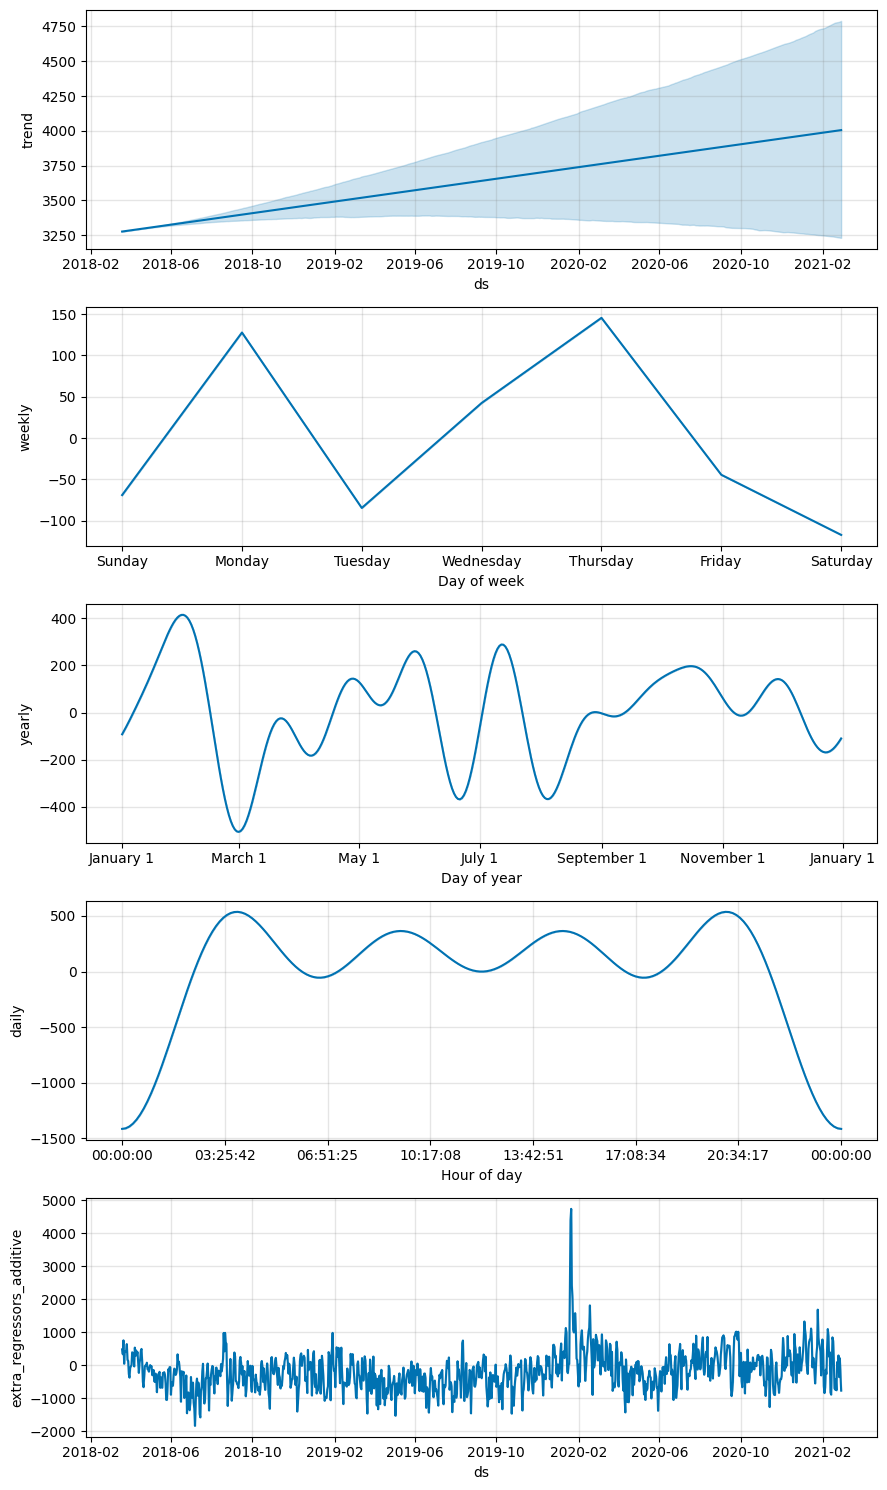

In [47]:
# Plot the components of the forecast
fig = model2.plot_components(forecast2)
#Day of daily seasonality with highest value is Thursday

In [48]:
regressors2 = ['SysLoad','GasPrice']

In [49]:
#multivariate model without Tmax
model3 = Prophet(daily_seasonality=True)

In [50]:
for regressor in regressors2 :
    model3.add_regressor(regressor)


In [51]:
model3.fit(train_data.drop(['Tmax'],axis=1))

DEBUG:cmdstanpy:input tempfile: /tmp/tmpadhql809/fds7o0qp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpadhql809/fbm97y4l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=812', 'data', 'file=/tmp/tmpadhql809/fds7o0qp.json', 'init=/tmp/tmpadhql809/fbm97y4l.json', 'output', 'file=/tmp/tmpadhql809/prophet_modelj7_d56mf/prophet_model-20230404122934.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [52]:
future = pd.DataFrame({
  'ds': pd.date_range(start='2018-03-20', end='2021-02-28')
})

for regressor in regressors2:
    future['SysLoad'] = train_data['SysLoad']
    future['GasPrice'] = train_data['GasPrice']

forecast3 = model3.predict(future)


In [53]:
#mean absolute percentage error of multivariate model without Tmax
mape(test_data['y'],forecast3['yhat'])

400.87